<a href="https://colab.research.google.com/github/ZT-715/QuarentenaDadosChallenges/blob/master/ChallengesQuarentenaDadosAula1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lendo os dados do MovieLens


Importaçao do Pandas lib:

In [0]:
import pandas as pd

Criando Pandas DataFrame com dados dos filmes

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
#filme as DataFrame
filmes.columns = ["filmeID", "titulo", "genero"]
filmes.head()

In [0]:
# easly documantation:
# filmes.head?

Criando DataFrame com dados de rating

In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.head()

Informaçoes sobre o DataFrame (row, columns)

In [0]:
avaliacoes.shape

Renomeando colunas para fácil entendimento


In [0]:
avaliacoes.columns = ["votoUID","filmeID","nota","momento"]

In [0]:
avaliacoes.describe()

Separando informaçoes do filmeID '1'(Toy Story 1)

In [0]:
toyStory = avaliacoes.query("filmeID==1")

Informaçoes sobre nota de Toy Story 1

In [0]:
toyStory["nota"].describe()

Média da nota do filme

In [0]:
toyStory["nota"].mean()

# Aula 1

### Desafio 4 e 2
  Aredondar notas media para duas casas decimais e mudar o nome da coluna.

Separa medias por filme:

In [0]:
media_por_filmes = avaliacoes.groupby("filmeID")["nota"].mean().round(2).rename("nota_media")
media_por_filmes.head()

  Mudar o nome da coluna após join

In [0]:
filmes_com_media = filmes.join(media_por_filmes, on="filmeID")
#filmes_com_media.columns = ['notaMedia' if x=='nota' else x 
#                           for x in filmes_com_media.columns]
filmes_com_media.head()

### Desafio 1

Encontre os 18 filmes que nao tem avaliação

In [0]:
filmes_sem_nota = filmes_com_media.query("nota_media!=nota_media")

filmes_sem_nota["titulo"]

### Desafio 3
  Colocar numero de avaliaçoes por filme, isto é, o total de votos por filme.

Criando uma serie com o numero de vezes que um filme voi votado, e nomeando-a 'votos'.

In [0]:
numero_de_votos = avaliacoes.groupby(["filmeID"]).size().rename("votos")
numero_de_votos.head(5)

  Juntando a serie com votos o DataFrame com medias de nota. E filtrando apenas os filmes dos quais tem votos(retirando os que tem campo NaN nos valores de rating).

In [0]:
filmes_votos_medias = filmes_com_media.join(numero_de_votos, on="filmeID").query("votos==votos")

#### Ranking dos filmes com mais votos:

In [0]:
filmes_top_votos = filmes_votos_medias.sort_values("votos", ascending=False).head(10)

filmes_top_votos

### Desafio 5
  Descobrir os genoros de filmes(quais são eles)


In [0]:
genres = filmes["genero"].str.split("|")

genres_types = []
for i in genres: 
  for genre in i:
    if (not genre in genres_types): genres_types.append(genre) 
genres_types

### Desafio 6
  contabilizar quantia de apariçao dos generos

In [0]:
filmes_por_genero = {}
for genre in genres_types: filmes_por_genero[genre] = 0
for i in genres: 
  for genre in i:
    if genre in filmes_por_genero:
      filmes_por_genero[genre] += 1
filmes_por_genero 

### Desafio 7
  Plot grafico de apariçoes de cada genero. Grafico do tipo barra

#### Gráfico do número de filmes por gênero

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.figure(figsize=[20, 12], dpi=70)
plt.bar(*zip(*filmes_por_genero.items()), tick_label=list(filmes_por_genero.keys()))
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation='85')
plt.xlabel("Generos")
plt.ylabel("Numero de Filmes")

# Aula 2

In [0]:
import seaborn as sns

## Desafio 1

  Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes, de forma a deixar as legendas mais legíveis.

In [0]:
sns.set_style("whitegrid")

filmes_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
barplt = sns.barplot(x=filmes_genero.index,
            y=filmes_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
barplt.set_xticklabels(barplt.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## Desafio 2 e 6

  Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

  Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
def plot_filme(n):
  f, axes = plt.subplots(1, 2, figsize = (16,8))
  notas_do_filme = avaliacoes.query(f'filmeID == {n}')["nota"]

  sns.distplot(notas_do_filme, bins = 10, ax = axes[0], kde= False)

  g = sns.boxplot(data = avaliacoes.query(f'filmeID == {n}'), x = 'filmeID',y = 'nota', ax = axes[1])
  plt.show()
  return notas_do_filme.describe()

In [0]:
plot_filme(152081)#zootopia

In [0]:
plot_filme(2762)#sixth sense

In [0]:
plot_filme(2150)# The Gods Must Be Crazy

## Desafio 3

  Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
id_filmes_top_votos = (filmes_top_votos["filmeID"].tolist())
id_filmes_top_votos = id_filmes_top_votos
print(id_filmes_top_votos)

In [0]:
#for filmeID in id_filmes_top_votos: plot_box_filme(filmeID) 
plt.figure(figsize=(16,8))
sns.boxplot(data=avaliacoes.query("filmeID in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]"),
            x="filmeID",
            y="nota")

## Desafio 4
  Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [0]:
avaliacoesComTitulo = avaliacoes.merge(filmes[["titulo", "filmeID"]], on="filmeID")
[["votoUID", "filmeID", "titulo", "nota"]]

avaliacoesComTitulo.head()

In [0]:
plt.figure(figsize=[10,8])
sns.boxplot(data = avaliacoesComTitulo.query("filmeID in [1,2,919,46578]"),
            x="titulo",
            y="nota")
plt.xticks(rotation=65)

## Desafio 5
  Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
filmesMediana = avaliacoes.groupby("filmeID")["nota"].median().rename("mediana")

filmesMednMediana = filmes_votos_medias.join(filmesMediana, on="filmeID")

In [0]:
filmesModa = avaliacoes.groupby("filmeID")["nota"].agg(pd.Series.mode).rename("moda")

filmesInfo = filmesMednMediana.join(filmesModa, on="filmeID")

In [0]:
filmesInfo = filmesInfo[['filmeID', 'titulo', 'genero', 'votos', 'nota_media', 'mediana', 'moda']]
filmesInfo = filmesInfo.rename(columns={'nota_media': 'média'})

In [0]:
filmesInfo.query("votos > 1").sort_values("média", ascending=False)[50:60]

In [0]:
filmesInfo.query("votos > 1").sort_values("média", ascending=False)[5000:5010]

In [0]:
filmesInfo.query("votos > 1").sort_values("média", ascending=False)[6200:]

In [0]:
def explorar_filme(filmeID):
  filme = filmesInfo.query(f"filmeID == {filmeID} ")
  
  print(f"Filme: {filme.titulo.values[0]}", end="\n\n")
  print(f"Votos: {filme.votos.values[0]}")
  print(f"Média: {filme.média.values[0]}")
  print(f"Mediana: {filme.mediana.values[0]}")
  print(f"Moda: {filme.moda.values[0]}", end="\n-------------\n")

In [0]:
explorar_filme(1041)
explorar_filme(47044)
explorar_filme(4580)

## Desafio 7

  Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
filmeAnos = filmes['titulo'].str.extract('\((\d+)\)$')
filmeAnos.columns = ["ano"]

In [0]:
filmeAnos.head()

In [0]:
filmesInfo = filmesInfo.join(filmeAnos, on="filmeID")

In [0]:
MediaPorAno = filmesInfo.groupby("ano")["média"].mean()

In [0]:
MediaPorAno.plot(figsize=[35,5], kind="bar")

In [0]:
MediaPorAno.head()#alguns anos nao tem filmes?

# Aula 3

  Dados de amostra do IMDB

In [0]:
#imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
import matplotlib.pyplot as plt
import seaborn as sns

imdb = pd.read_csv("./drive/My Drive/Colab Notebooks/movie_metadata.csv")

In [23]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

  Informaçoes repetidas encontradas durante a aula, limpalás é importante:

In [25]:
imdb = imdb.drop_duplicates()
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

Diferentes países tem diferentes sistemas monetários no db

In [26]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [27]:
imdbUSA = imdb.query("country == 'USA'")
imdbUSA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3773 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3759 non-null   object 
 1   director_name              3700 non-null   object 
 2   num_critic_for_reviews     3735 non-null   float64
 3   duration                   3767 non-null   float64
 4   director_facebook_likes    3700 non-null   float64
 5   actor_3_facebook_likes     3760 non-null   float64
 6   actor_2_name               3766 non-null   object 
 7   actor_1_facebook_likes     3769 non-null   float64
 8   gross                      3208 non-null   float64
 9   genres                     3773 non-null   object 
 10  actor_1_name               3769 non-null   object 
 11  movie_title                3773 non-null   object 
 12  num_voted_users            3773 non-null   int64  
 13  cast_total_facebook_likes  3773 non-null   int64

## Desafio 1

  Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [28]:
filmesColoridos = imdbUSA.query("color == 'Color'")
filmesPretoEBranco = imdbUSA.query("color == ' Black and White'")

# 4% dos filmes sao preto e branco neste DB
round(len(filmesPretoEBranco["color"]) /
      ((len(filmesPretoEBranco["color"]) +
        len(filmesColoridos["color"]))), 2) 

0.04

In [29]:
filmesColoridos["imdb_score"].mean()

6.337025754638607

In [30]:
filmesPretoEBranco["imdb_score"].mean()

7.158783783783784

### box plot notas filme preto e branco x filmes coloridos

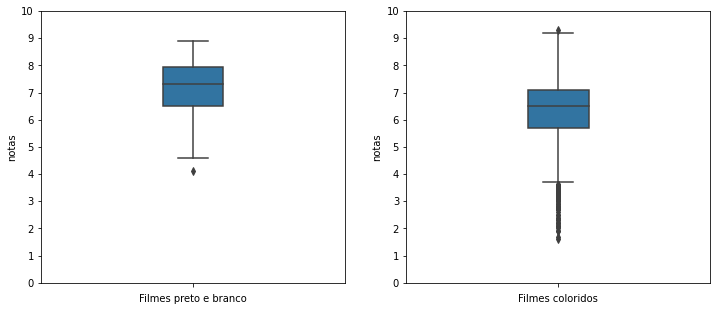

In [31]:
f, a = plt.subplots(1, 2, figsize=[12,5])

PeBplt = sns.boxplot(data=filmesPretoEBranco, y=["imdb_score"], width=0.2, ax=a[0])
PeBplt.set(xlabel='Filmes preto e branco', ylabel='notas', yticks=range(11))

Colplt = sns.boxplot(data=filmesColoridos, y=["imdb_score"], width=0.2, ax=a[1])
Colplt.set(xlabel='Filmes coloridos', ylabel='notas', yticks=range(11))

plt.show()

Filmes preto e branco parecem ter um número de notas geralmente acíma dos coloridos, entretanto levando em conta que apenas 4% dos filmes totais levados em conta sao preto e branco, e os gráficos acima, é possivel entender que embora tenham uma média mais elevada em geral, os filmes preto e brano são a minoria, além de que de acordo com o próprio gráfico é possivel ver que há tambem filmes coloridos com nota um tanto mais elevada que os filmes preto e branco com maior nota.




## Desafio 2

No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [32]:
imdbUSA['lucro'] = imdbUSA['gross'] - imdbUSA['budget']

#encontra o filme com o menor lucro
imdbUSA.loc[imdbUSA.lucro.sort_values().head(1).index] 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


## Desafio 3
  Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [0]:
newMovies = imdbUSA.sort_values("title_year", ascending=False).query("title_year>2015")
#os filmes mais novos sao de 2016

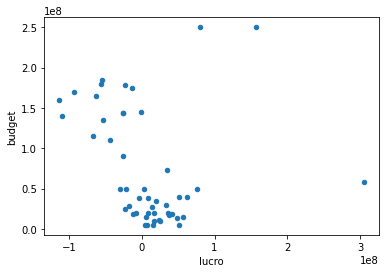

In [34]:
newMovies[["budget", "lucro"]].plot(kind="scatter", y='budget', x='lucro')

Contabilazando os filmes do ultimo ano presente no DF, boa parte deles nao teve nenhum lucro até o momente em que os dados foram tirados, os unicos que consiguram recuperar o gasto ou lucrar algo foram os que apresentam um baixo budget e alguns outliers.

In [35]:
NovosFilmesComLucro = len(newMovies.query("lucro > 0")["lucro"])
NovosFilmesComPrejuizo = len(newMovies.query("lucro <= 0")["lucro"])

print(f"Há {NovosFilmesComLucro} com algum lucro, {NovosFilmesComPrejuizo} com prejuizo({round(((NovosFilmesComPrejuizo / (NovosFilmesComPrejuizo + NovosFilmesComLucro))*100),2)}%)")

Há 27 com algum lucro, 22 com prejuizo(44.9%)


Observando essas informaçoes, porém sem saber exatamente quando elas foram coletadas, ainda nos permite comparálas com as informaçoes dos outro anos:

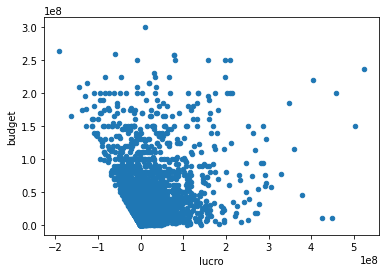

In [36]:
imdbUSA[["budget", "lucro"]].plot(kind="scatter", y='budget', x='lucro')

In [37]:
FilmesComLucro = len(imdbUSA.query("lucro > 0")["lucro"])
FilmesComPrejuizo = len(imdbUSA.query("lucro <= 0")["lucro"])

print(f"Há {FilmesComLucro} com algum lucro, {FilmesComPrejuizo} com prejuizo({round(((FilmesComPrejuizo / (FilmesComPrejuizo+FilmesComLucro))*100),2)}%)")

Há 1746 com algum lucro, 1301 com prejuizo(42.7%)


Contabilizando boa parte dos filmes nos Estado Unido, 42.7% deles tem prejuizo(lucro <= 0), sendo assim os filmes contabilizados no ultimo ano do DB parecem indicar que os seus dados foram coletados com algum espaço de tempo após o lançamento dos filmes ja que o balanço de filmes com lucro X filmes com prejuizo parece se manter.

## Desafio 4

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

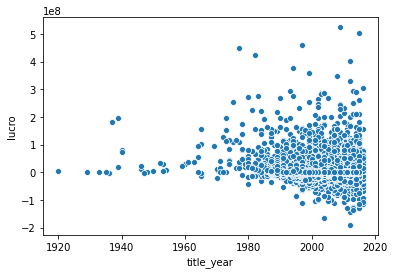

In [38]:
#gráfico passado na aula
budget_gross = imdbUSA.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

In [39]:
#separa filmes antes daguerra e exclui os que nao tem lucro contabilizado
filmesPreGuerra = imdbUSA.query("title_year < 1941").query("lucro==lucro")

#pega os top 5 de maior lucro e separa as mais series uteis
filmesPreGuerra.sort_values("title_year", ascending=False)[["movie_title", "gross", "budget", "lucro","imdb_score"]].head()

,movie_title,gross,budget,lucro,imdb_score
1143,Pinocchio,84300000.0,2600000.0,81700000.0,7.5
4225,Fantasia,76400000.0,2280000.0,74120000.0,7.8
3970,Gone with the Wind,198655278.0,3977000.0,194678278.0,8.2
4157,The Wizard of Oz,22202612.0,2800000.0,19402612.0,8.1
4449,Snow White and the Seven Dwarfs,184925485.0,2000000.0,182925485.0,7.7


## Desafio 5
No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [69]:
filmesPorDiretor = imdbUSA.director_name.value_counts().rename("filmes_do_diretor")

arrecadacaoPorDiretor = imdbUSA.join(filmesPorDiretor, on="director_name")
arrecadacaoPorDiretor.query(" 19 > filmes_do_diretor > 16")[["director_name", "gross", "title_year", 'filmes_do_diretor']]

,director_name,gross,title_year,filmes_do_diretor
1861,Woody Allen,7496522.0,2001.0,18.0
2131,Woody Allen,16684352.0,2012.0,18.0
2275,Woody Allen,13383737.0,1994.0,18.0
2287,Woody Allen,10569071.0,1997.0,18.0
2291,Woody Allen,9714482.0,1996.0,18.0
2415,Woody Allen,33404871.0,2013.0,18.0
2430,Woody Allen,17071230.0,2000.0,18.0
2457,Woody Allen,3203044.0,2003.0,18.0
2567,Woody Allen,14792779.0,1987.0,18.0
2577,Woody Allen,4839383.0,2002.0,18.0


**Não há duvidas A TESE está CORRETISSIMA!**

## Desafio 6

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

  Nota-se ao separar um data frame apenas dos USA que maior parte dos filmes se constituem nos Estados Unidos, apenas 15% de outros países.

In [41]:
 round((len(imdbUSA.movie_title) / len(imdb.movie_title)), 2)

0.75

  Além disso ao excecutar um pair-plot com o ano do filme, seu orçamento e seu arrecadamento é possivel ver um aumento extremamente significativo do dinheiro circulando no mercado de filmes com o tempo:

<Figure size 1000x1000 with 0 Axes>

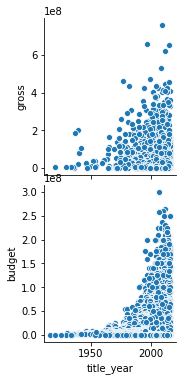

In [42]:
plt.figure(figsize=[10,10], dpi=100)
sns.pairplot(data = imdbUSA[["gross", "budget", "title_year"]], x_vars=["title_year"], y_vars=["gross", "budget"])

## Desafio 7 e 8
Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

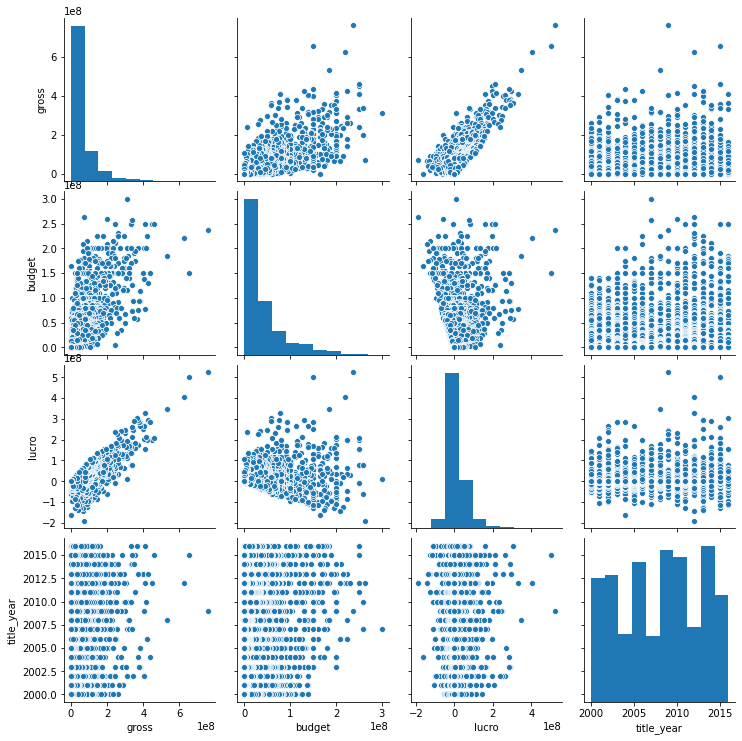

In [43]:
filmesPos2000 = imdbUSA.query("title_year >= 2000")

sns.pairplot(data = filmesPos2000[["gross", "budget","lucro", "title_year"]])

O unico gráfico do qual aparenta apresentar uma correlaçao visível é os de gross x lucro, indicando que filmes com maior arecadaçao tendem á ter maior lucro.

## Desafio 9
Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

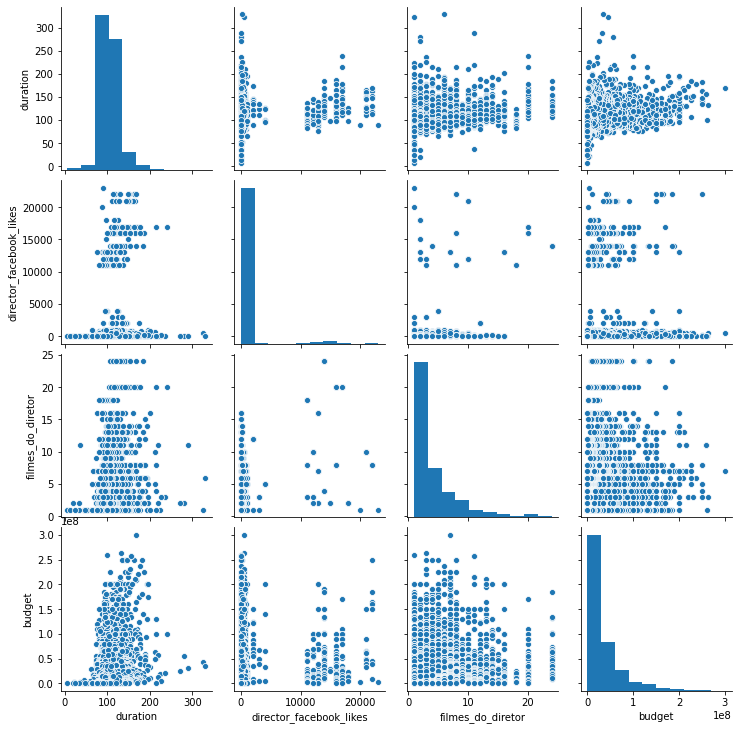

In [72]:
sns.pairplot(data=arrecadacaoPorDiretor[["duration", "director_facebook_likes", "filmes_do_diretor", "budget"]])

In [75]:
arrecadacaoPorDiretor[["duration", "director_facebook_likes", "filmes_do_diretor", "budget"]].corr()

,duration,director_facebook_likes,filmes_do_diretor,budget
duration,1.000000,0.205327,0.306190,0.315569
director_facebook_likes,0.205327,1.000000,0.533633,0.098204
filmes_do_diretor,0.306190,0.533633,1.000000,0.235551
budget,0.315569,0.098204,0.235551,1.000000


Supus que diretores com mais filmes teriam mais likes no facebook,e talves recebecem budgets maiores para seus filmes, porem nao é oq se apresenta no gráfico, nao sei se por ser apenas um sample e nao a base completa ou se por realmente nao ter nenhuma relaçao.